* __ID__: Unique passenger identifier

* __Gender__: Gender of the passenger (Female/Male)

* __Age__: Age of the passenger

* __Customer Type__: Type of airline customer (First-time/Returning)

* __Type of Travel__: Purpose of the flight (Business/Personal)

* __Class__: Travel class in the airplane for the passenger seat

* __Flight Distance__: Flight distance in miles

* __Departure Delay__: Flight departure delay in minutes

* __Arrival Delay__: Flight arrival delay in minutes

* __Departure and Arrival Time Convenience__: "Satisfaction level with the convenience of the flight departure and arrival times from 1 (lowest) to 5 (highest) - 0 means ""not applicable"""

* __Ease of Online Booking__: "Satisfaction level with the online booking experience from 1 (lowest) to 5 (highest) - 0 means ""not applicable"""

* __Check-in Service__: "Satisfaction level with the check-in service from 1 (lowest) to 5 (highest) - 0 means ""not applicable"""

* __Online Boarding__: "Satisfaction level with the online boarding experience from 1 (lowest) to 5 (highest) - 0 means ""not applicable"""

* __Gate Location__: "Satisfaction level with the gate location in the airport from 1 (lowest) to 5 (highest) - 0 means ""not applicable"""

* __On-board Service__: "Satisfaction level with the on-boarding service in the airport from 1 (lowest) to 5 (highest) - 0 means ""not applicable"""

* __Seat Comfort__: "Satisfaction level with the comfort of the airplane seat from 1 (lowest) to 5 (highest) - 0 means ""not applicable"""

* __Leg Room Service__: "Satisfaction level with the leg room of the airplane seat from 1 (lowest) to 5 (highest) - 0 means ""not applicable"""

* __Cleanliness__: "Satisfaction level with the cleanliness of the airplane from 1 (lowest) to 5 (highest) - 0 means ""not applicable"""

* __Food and Drink__: "Satisfaction level with the food and drinks on the airplane from 1 (lowest) to 5 (highest) - 0 means ""not applicable"""

* __In-flight Service__: "Satisfaction level with the in-flight service from 1 (lowest) to 5 (highest) - 0 means ""not applicable"""

* __In-flight Wifi Service__: "Satisfaction level with the in-flight Wifi service from 1 (lowest) to 5 (highest) - 0 means ""not applicable"""

* __In-flight Entertainment__: "Satisfaction level with the in-flight entertainment from 1 (lowest) to 5 (highest) - 0 means ""not applicable"""

* __Baggage Handling__: "Satisfaction level with the baggage handling from the airline from 1 (lowest) to 5 (highest) - 0 means ""not applicable"""

* __Satisfaction__: Overall satisfaction level with the airline (Satisfied/Neutral or unsatisfied)

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score, \
                            confusion_matrix

In [ ]:
# General exploration

In [2]:
sns.set_theme(palette="bright")

In [3]:
input_file = "data/Airline_Passenger_Satisfaction/airline_passenger_satisfaction.csv"
airline_info_df = pd.read_csv(input_file)
airline_info_df.head()

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,Male,48,First-time,Business,Business,821,2,5.0,3,...,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,2,Female,35,Returning,Business,Business,821,26,39.0,2,...,5,4,5,5,3,5,2,5,5,Satisfied
2,3,Male,41,Returning,Business,Business,853,0,0.0,4,...,3,5,3,5,5,3,4,3,3,Satisfied
3,4,Male,50,Returning,Business,Business,1905,0,0.0,2,...,5,5,5,4,4,5,2,5,5,Satisfied
4,5,Female,49,Returning,Business,Business,3470,0,1.0,3,...,3,4,4,5,4,3,3,3,3,Satisfied


In [4]:
airline_info_df.describe()

,ID,Age,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling
count,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000
mean,64940.500000,39.427957,1190.316392,14.713713,15.091129,3.057599,2.756876,3.306267,3.252633,2.976925,3.383023,3.441361,3.350878,3.286326,3.204774,3.642193,2.728696,3.358077,3.632114
std,37493.270818,15.119360,997.452477,38.071126,38.465650,1.526741,1.401740,1.266185,1.350719,1.278520,1.287099,1.319289,1.316252,1.313682,1.329933,1.176669,1.329340,1.334049,1.180025
min,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,32470.750000,27.000000,414.000000,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,3.000000
50%,64940.500000,40.000000,844.000000,0.000000,0.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,3.000000,3.000000,4.000000,3.000000,4.000000,4.000000
75%,97410.250000,51.000000,1744.000000,12.000000,13.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,5.000000
max,129880.000000,85.000000,4983.000000,1592.000000,1584.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [5]:
airline_info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   ID                                      129880 non-null  int64  
 1   Gender                                  129880 non-null  object 
 2   Age                                     129880 non-null  int64  
 3   Customer Type                           129880 non-null  object 
 4   Type of Travel                          129880 non-null  object 
 5   Class                                   129880 non-null  object 
 6   Flight Distance                         129880 non-null  int64  
 7   Departure Delay                         129880 non-null  int64  
 8   Arrival Delay                           129487 non-null  float64
 9   Departure and Arrival Time Convenience  129880 non-null  int64  
 10  Ease of Online Booking                  1298

In [6]:
airline_info_df.isnull().any()

ID                                        False
Gender                                    False
Age                                       False
Customer Type                             False
Type of Travel                            False
Class                                     False
Flight Distance                           False
Departure Delay                           False
Arrival Delay                              True
Departure and Arrival Time Convenience    False
Ease of Online Booking                    False
Check-in Service                          False
Online Boarding                           False
Gate Location                             False
On-board Service                          False
Seat Comfort                              False
Leg Room Service                          False
Cleanliness                               False
Food and Drink                            False
In-flight Service                         False
In-flight Wifi Service                  

In [7]:
col_names_ordinal_type = ["Departure and Arrival Time Convenience",
            "Ease of Online Booking",
            "Check-in Service",
            "Online Boarding",
            "Gate Location",
            "On-board Service",
            "Seat Comfort",
            "Leg Room Service",
            "Cleanliness",
            "Food and Drink",
            "In-flight Service",
            "In-flight Wifi Service",
            "In-flight Entertainment",
            "Baggage Handling"]

In [8]:
airline_info_df[col_names_ordinal_type] = airline_info_df[col_names_ordinal_type].astype("int8")
airline_info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   ID                                      129880 non-null  int64  
 1   Gender                                  129880 non-null  object 
 2   Age                                     129880 non-null  int64  
 3   Customer Type                           129880 non-null  object 
 4   Type of Travel                          129880 non-null  object 
 5   Class                                   129880 non-null  object 
 6   Flight Distance                         129880 non-null  int64  
 7   Departure Delay                         129880 non-null  int64  
 8   Arrival Delay                           129487 non-null  float64
 9   Departure and Arrival Time Convenience  129880 non-null  int8   
 10  Ease of Online Booking                  1298

In [48]:
# Satisfaction exploration

In [9]:
mask_satisfied = airline_info_df["Satisfaction"] == "Satisfied"
satisfied_number = airline_info_df[mask_satisfied].shape[0]

satisfied_pcg = satisfied_number / airline_info_df.shape[0]

print(f"General satisfaction percentage: {round(satisfied_pcg * 100, 2)}%")

General satisfaction percentage: 43.45%


In [10]:
def GetSatisfactionPercentage(data: pd.DataFrame, variable_reference:str|int,
                               postive_satisfaction:str|int, variable_target:str|int,
                               show_pcg:bool=False) -> tuple:
    
    '''
    This function computes the Satisfaction Percentage according to some variable

    Parameters
    ----------

    data: pd.DataFrame
        Pandas data frame to compute the satisfaction percentage

    variable_reference: integer or string; int|str
        Column name to find the satisfaction level values. Dichotomic values are expected.

    positive_satisfaction: integer or string: int|str
        Value describing the positive class to be found in variable_reference.

    variable_target: integer or string; int|str
        Column name to compute the satisfaction percentage according to this variable. Categorical values are expected

    show_pcg: bool; default=False
        Show on screen the percentage obtained

        
    Returns
    -------

    (categories, percentages): Two lists containing the categories found and the satisfaction percentage respectively 

    '''

    available_options = data[variable_target].unique().tolist()
    percentages = []

    for option in available_options:

        filtered_data_by_variable = data[data[variable_target] == option]
        satisfaction_by_variable_counts = (filtered_data_by_variable[variable_reference] == postive_satisfaction).value_counts()
        satisfaction_by_variable_pcg = satisfaction_by_variable_counts[True] / satisfaction_by_variable_counts.sum()
        pcg = round(satisfaction_by_variable_pcg * 100, 2)
        percentages.append(pcg)

        if show_pcg:
            print(f"Satisfaction percentage by {variable_target} - {option}: {pcg}%")

    return(available_options, percentages)

In [11]:
satisfaction_per_variables = []
categorical_variables = ["Gender", "Customer Type", "Type of Travel", "Class"]

for columns in categorical_variables:
    tmp = GetSatisfactionPercentage(airline_info_df, "Satisfaction", "Satisfied", columns, show_pcg=True)
    satisfaction_per_variables.append(tmp)

Satisfaction percentage by Gender - Male: 44.01%
Satisfaction percentage by Gender - Female: 42.9%
Satisfaction percentage by Customer Type - First-time: 23.97%
Satisfaction percentage by Customer Type - Returning: 47.81%
Satisfaction percentage by Type of Travel - Business: 58.37%
Satisfaction percentage by Type of Travel - Personal: 10.13%
Satisfaction percentage by Class - Business: 69.44%
Satisfaction percentage by Class - Economy: 18.77%
Satisfaction percentage by Class - Economy Plus: 24.64%


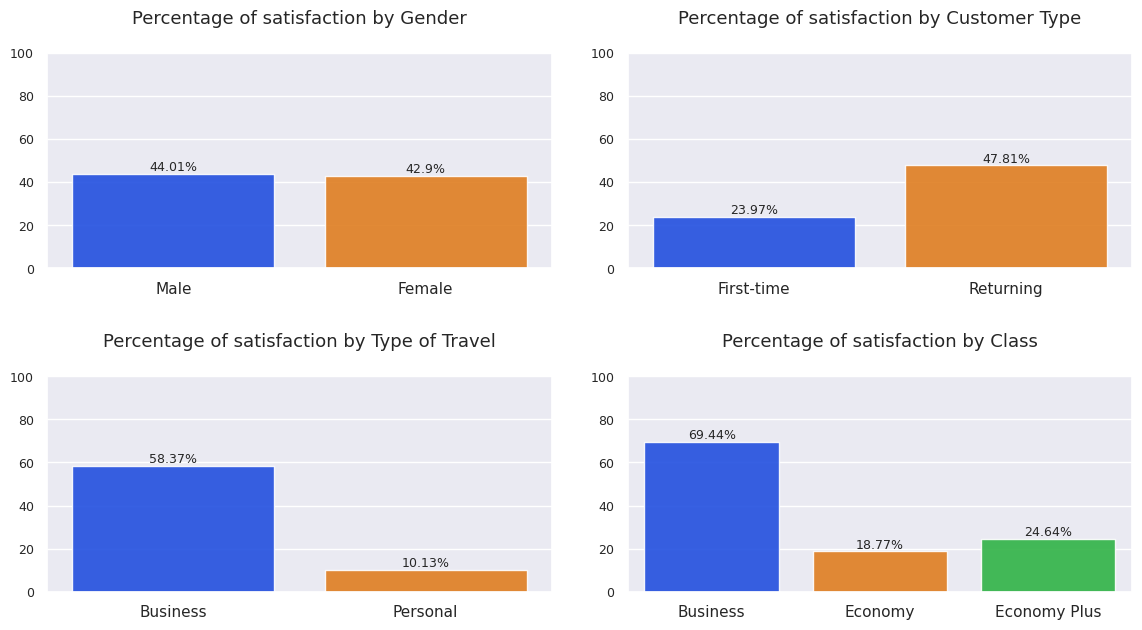

In [49]:
fig, axis = plt.subplots(2,2, figsize=(14,7))

# Reshaping to iterate for only one dimention
axis = axis.reshape(-1,)

for ax, c_v, s_p_v in zip(axis, categorical_variables, satisfaction_per_variables):
    sns.barplot(x=s_p_v[0], y=s_p_v[1], ax=ax, alpha=0.9)
    ax.set_title(f"Percentage of satisfaction by {c_v}\n", size=13)
    ax.set_ylim(0, 100)
    ax.tick_params(axis="y", labelsize=9)
    
    labels_on_bars = [str(pcg) + "%" for pcg in s_p_v[1]]
    ax.bar_label(ax.containers[0], labels=labels_on_bars, size=9)

fig.subplots_adjust(wspace=0.15, hspace=0.5)
plt.show()

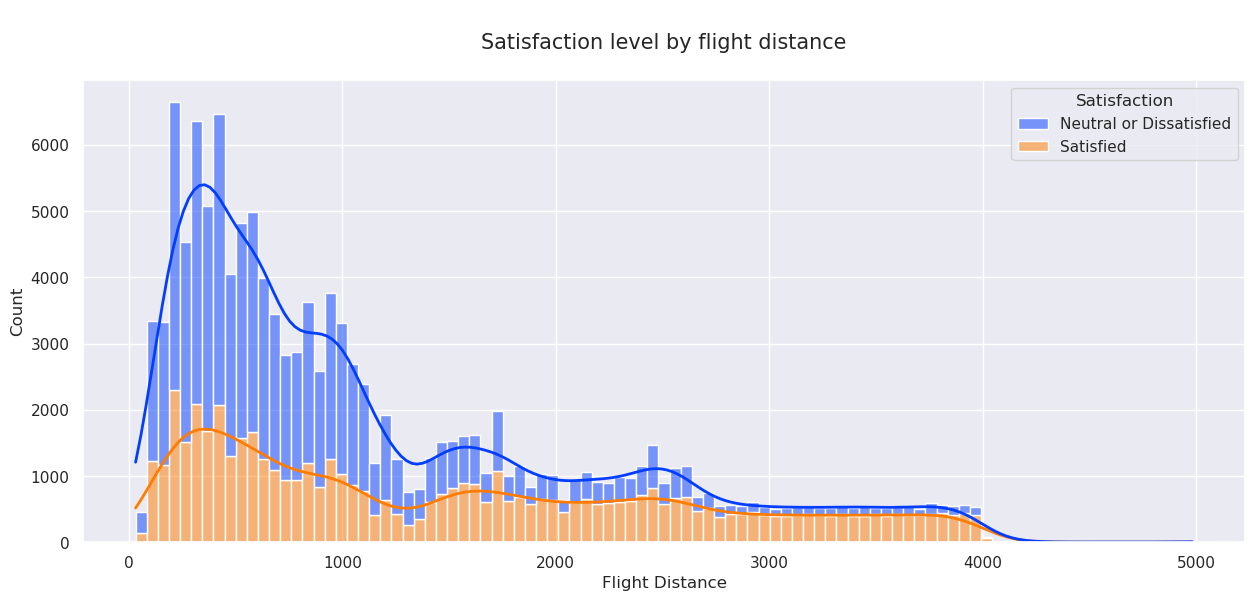

In [47]:
satisfied, neutral = airline_info_df[mask_satisfied], airline_info_df[~mask_satisfied]

fig, axis = plt.subplots(1,1, figsize=(15,6))

sns.histplot(data=airline_info_df, x="Flight Distance",
             hue="Satisfaction", ax=axis, linewidth=1,
             kde=True, multiple="stack", line_kws={"lw":2})

axis.set_title("\nSatisfaction level by flight distance\n", fontdict={"size":15})
plt.show()

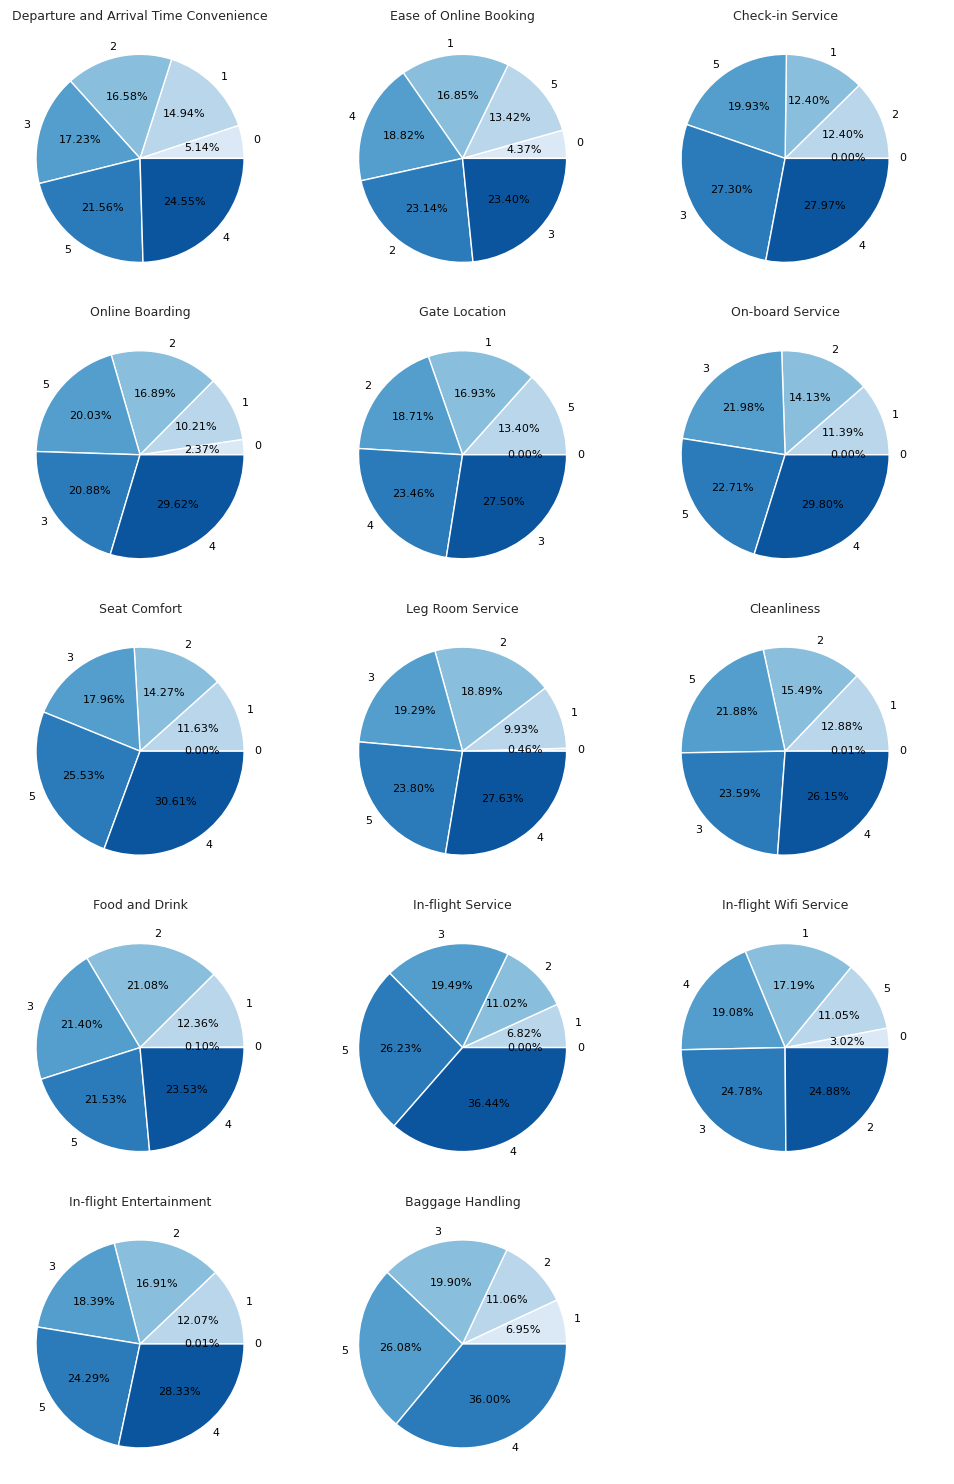

In [14]:
fig, axis = plt.subplots(5, 3, figsize=(10, 15), sharey=True)

axis = axis.reshape(-1,)
palete_colors = sns.color_palette("Blues", n_colors=6)

for ax, column in zip(axis, col_names_ordinal_type):

    satisfaction_level_by_services = airline_info_df[col_names_ordinal_type][column].value_counts()
    satisfaction_level_by_services = satisfaction_level_by_services.sort_values()

    ax.pie(satisfaction_level_by_services.values, labels=satisfaction_level_by_services.index,
            autopct="%.2f%%", textprops={"size": 8, "color":"black"},
            colors=palete_colors)
    
    ax.set_title(column, fontdict={"size":9})

axis[-1].axis("off")

plt.tight_layout()
plt.show()

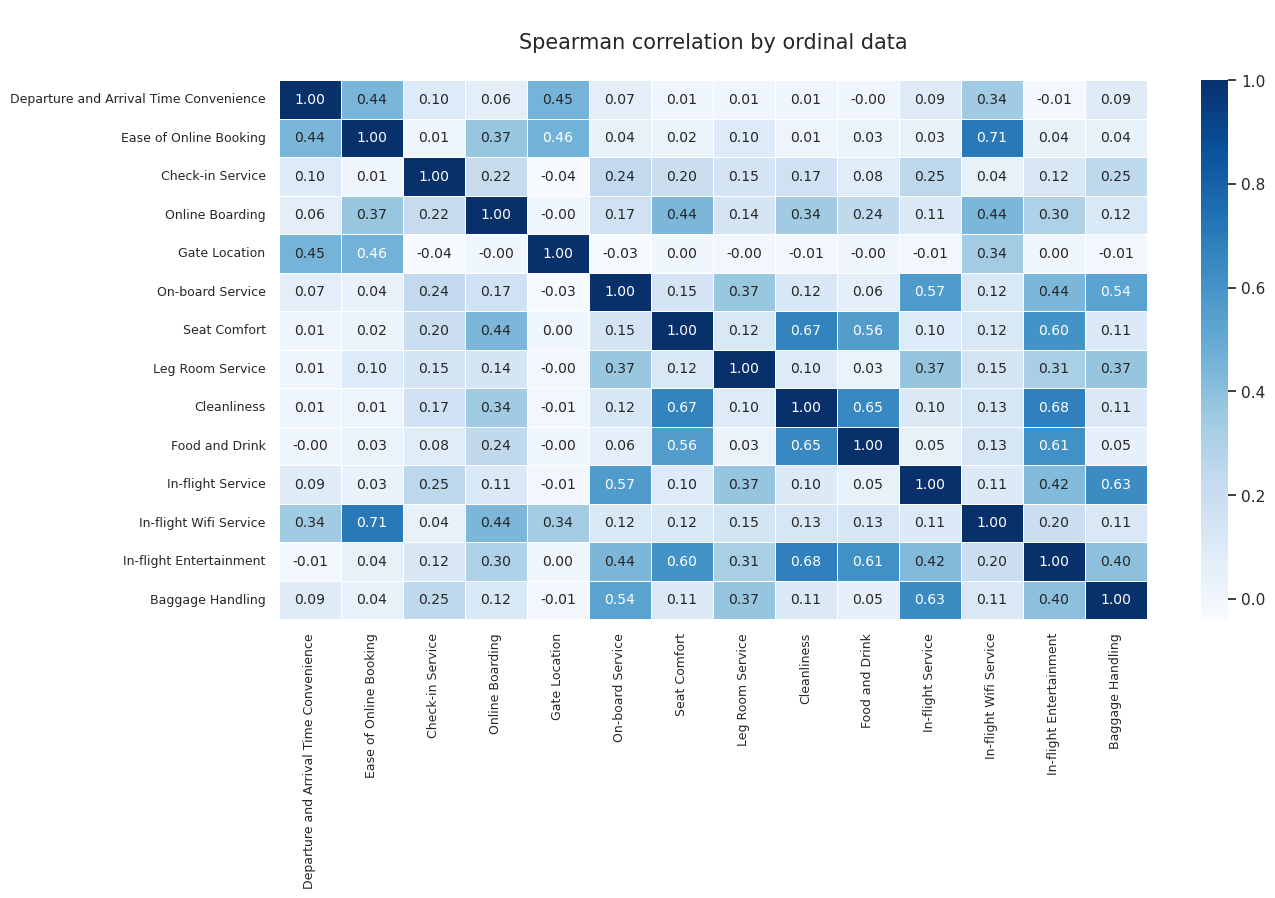

In [15]:
corr_spearman = airline_info_df[col_names_ordinal_type].corr(method="spearman")

fig, axis = plt.subplots(1,1, figsize=(14,7))

sns.heatmap(corr_spearman, annot=True, fmt=".2f", linewidth=0.5,
            annot_kws={"size":10}, ax=axis,
            cmap="Blues")

axis.tick_params(axis='y', labelsize=9)
axis.tick_params(axis='x', labelsize=9)
axis.set_title("\nSpearman correlation by ordinal data\n", fontdict={"size":15})
plt.show()

In [16]:
#col_names_ordinal_type
X = airline_info_df[col_names_ordinal_type].to_numpy()
y = airline_info_df["Satisfaction"].apply(lambda x: 1 if x == "Satisfied" else 0).to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=13)

print(f"Train size: {X_train.shape}")
print(f"Test size: {X_test.shape}")

Train size: (90916, 14)
Test size: (38964, 14)


In [17]:
clf_random_forest = RandomForestClassifier()
clf_random_forest.fit(X_train, y_train)

predict = clf_random_forest.predict(X_test)

print(f"Precision: {precision_score(y_test, predict)}")
print(f"Recall: {recall_score(y_test, predict)}")
print(f"Accuracy: {accuracy_score(y_test, predict)}")
print(f"F1-score: {f1_score(y_test, predict)}")

Precision: 0.9528582710649414
Recall: 0.9221588570756658
Accuracy: 0.9461040960886973
F1-score: 0.9372572452942933


In [18]:
positive_class = y_test[y_test == 1].shape[0]
negative_class = y_test[y_test == 0].shape[0]

print(f"Positive class: {positive_class}")
print(f"Negative class: {negative_class}")
print("Matrix")
print(confusion_matrix(y_test, predict, labels=[1,0]))

Positive class: 17009
Negative class: 21955
Matrix
[[15685  1324]
 [  776 21179]]


In [19]:
feature_importances = clf_random_forest.feature_importances_
feature_importances = pd.DataFrame([feature_importances, col_names_ordinal_type]).T

feature_importances.rename({0:"Score",1:"Variable"}, axis=1, inplace=True)
feature_importances.sort_values(by="Score", ascending=False, inplace=True)

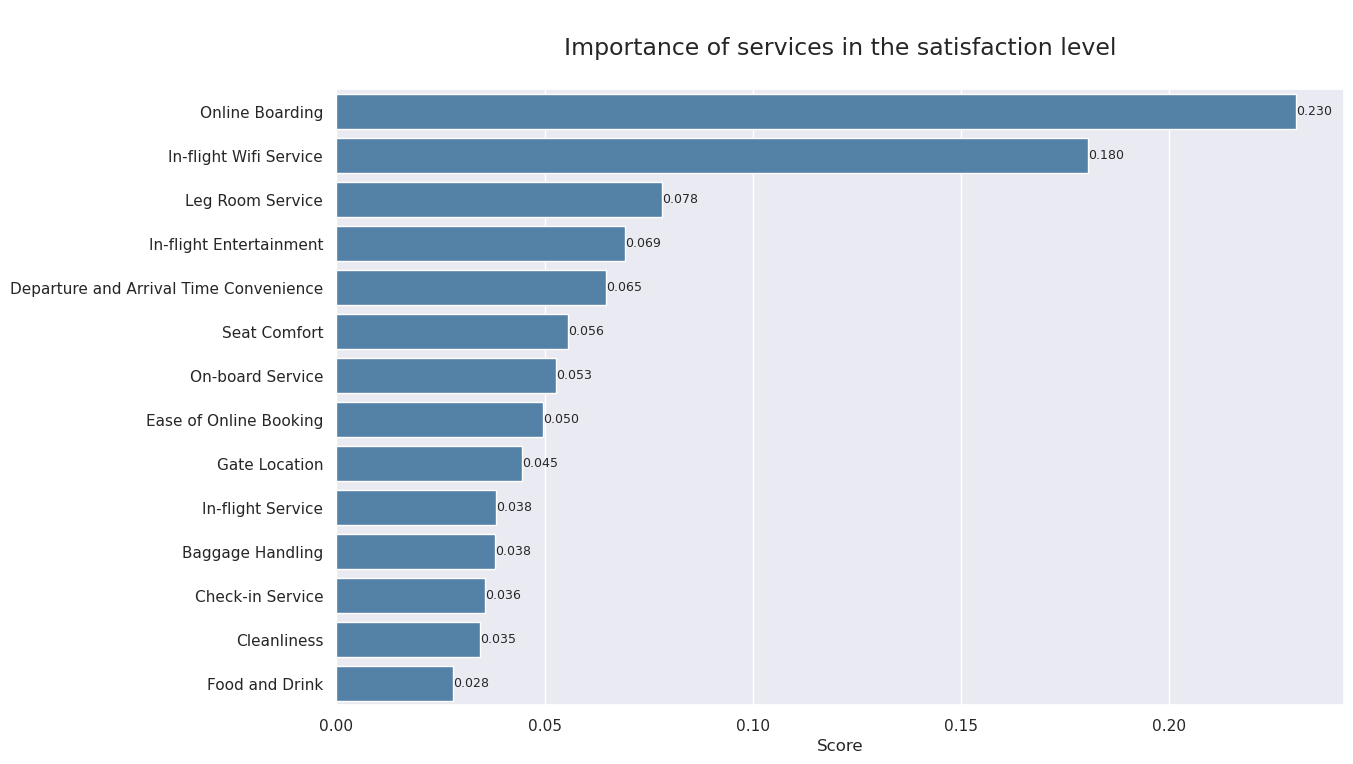

In [20]:
fig, axis = plt.subplots(1,1, figsize=(13,8))

sns.barplot(data=feature_importances, y="Variable", x="Score",
            color="steelblue", ax=axis)

axis.bar_label(axis.containers[0], size=9, fmt="%.3f")
axis.set_ylabel("")
axis.set_title("\nImportance of services in the satisfaction level\n", fontdict={"size":17})
plt.show()

In [21]:
# Passenger profile

In [22]:
customer_information_cols = ["Gender","Age", "Type of Travel", "Class", "Flight Distance", "Customer Type"]
customer_information_df = airline_info_df[customer_information_cols]
customer_information_df.head()

,Gender,Age,Type of Travel,Class,Flight Distance,Customer Type
0,Male,48,Business,Business,821,First-time
1,Female,35,Business,Business,821,Returning
2,Male,41,Business,Business,853,Returning
3,Male,50,Business,Business,1905,Returning
4,Female,49,Business,Business,3470,Returning


In [23]:
# Let's build barplots for the categorical data
mask_categorial_columns = customer_information_df.dtypes == "object"
categorical_columns = customer_information_df.dtypes[mask_categorial_columns].index
numeric_columns = customer_information_df.dtypes[~mask_categorial_columns].index

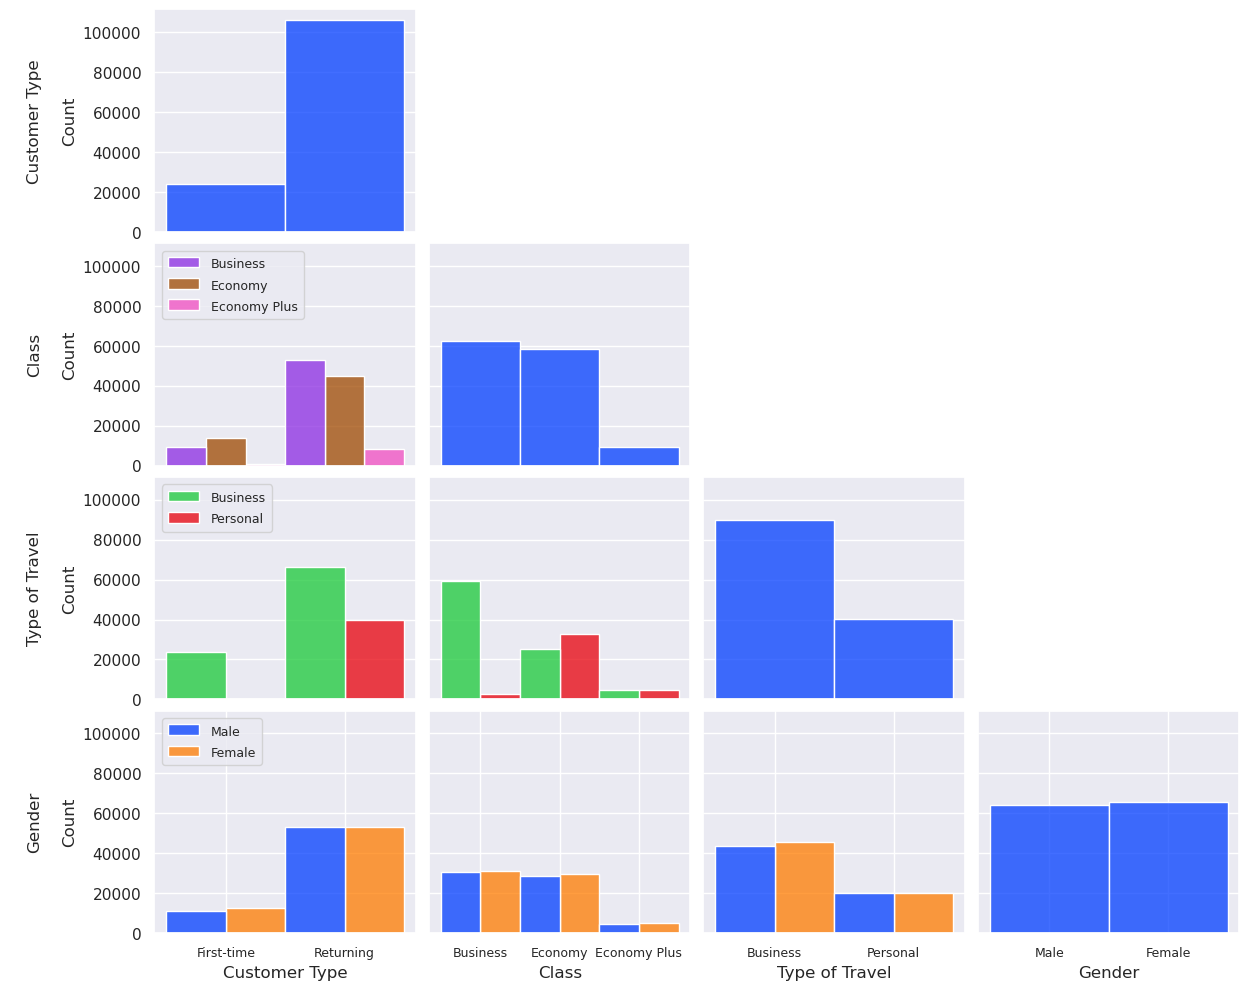

In [24]:
# Iterating from the bottom to the top of the subplots and from the right to the left
reversed_array = np.arange(categorical_columns.shape[0] - 1, -1, -1)

unique_categorical_values = airline_info_df[categorical_columns].nunique()
palete_colors = sns.color_palette("bright", n_colors=unique_categorical_values.sum())
palete_colors = list(palete_colors)

fig, axis = plt.subplots(categorical_columns.shape[0], categorical_columns.shape[0],
                         figsize=(14, 12), sharey=True)

for i, column_i in zip(reversed_array, categorical_columns):
    for j, column_j in zip(reversed_array, categorical_columns):

        # Digonal plots
        if i == j:
            sns.histplot(x=customer_information_df[column_j], ax=axis[i,j])
        # Upper tringular matrix
        elif j > i:
            axis[i,j].axis("off")
        # Everything else
        else:
            
            choose_n_colors = unique_categorical_values[column_i]
            
            sns.histplot(x=customer_information_df[column_j],
                        hue=customer_information_df[column_i],
                        stat="count", multiple="dodge",
                        ax=axis[i,j], palette=palete_colors[:choose_n_colors])
            
            # Formating the display of the legend
            if j > 0:
                axis[i,j].get_legend().remove()
            else:
                sns.move_legend(axis[i,j], "upper left")
                axis[i,j].set_ylabel(f"\n{column_i}\n\nCount")
                plt.setp(axis[i,j].get_legend().get_texts(), fontsize=9)
                axis[i,j].get_legend().set_title("")

        # Removing x labels except for the plots located at the bottom
        if i < (categorical_columns.shape[0] - 1):
            axis[i,j].axes.get_xaxis().set_visible(False)
        else:
            axis[i,j].tick_params(axis='x', labelsize=9)

    palete_colors = palete_colors[choose_n_colors:]

axis[i,j].set_ylabel(f"\n{column_i}\n\nCount")
fig.subplots_adjust(wspace=0.05, hspace=0.05)
plt.show()


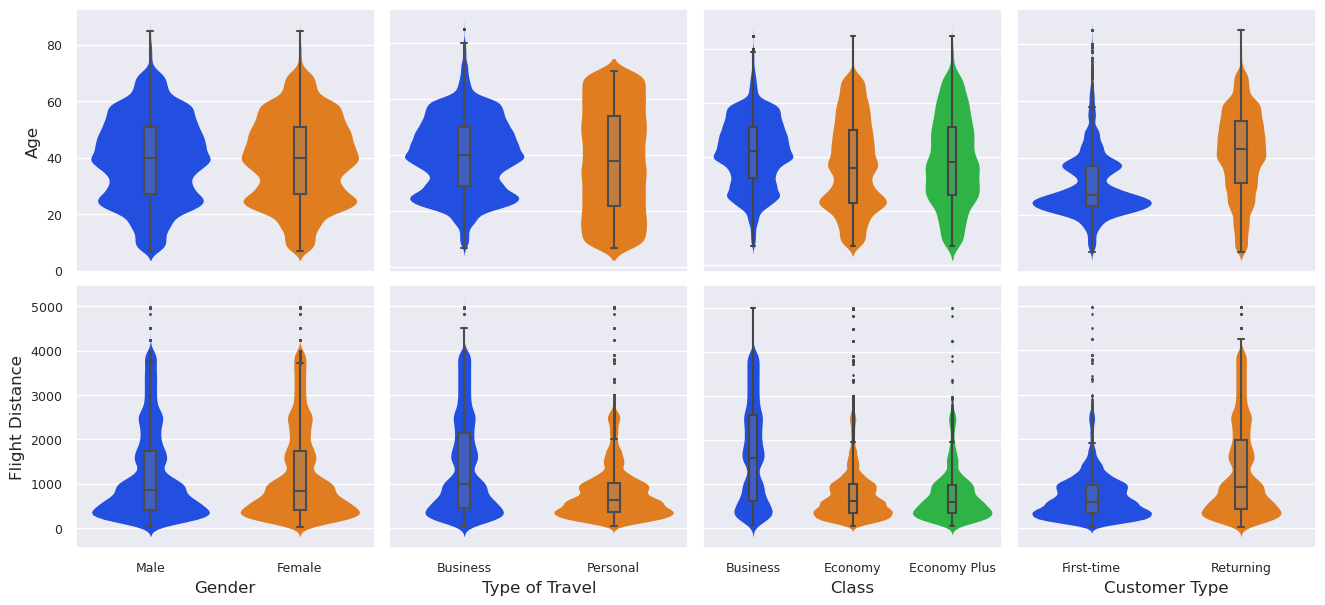

In [25]:
#numeric_columns = numeric_data_columns

fig, axis = plt.subplots(numeric_columns.shape[0], categorical_columns.shape[0],
                        figsize=(16,7))

for i, row_name in enumerate(numeric_columns):
    for j, col_name in enumerate(categorical_columns):
        
        sns.boxplot(data=customer_information_df, x=col_name,
                    y=row_name, ax=axis[i,j],
                    saturation=0.5, width=0.08,
                    boxprops={'zorder': 2}, fliersize=1)
        
        sns.violinplot(data=customer_information_df, x=col_name,
                        y=row_name, ax=axis[i,j],
                        linewidth=0, inner=None)

        if i != (numeric_columns.shape[0] - 1):
            axis[i,j].axes.get_xaxis().set_visible(False)
        else:
            axis[i,j].tick_params(axis='x', labelsize=9)
        
        if j > 0:
            axis[i,j].set_yticklabels([])
            axis[i,j].set_ylabel("")
        else:
            axis[i,j].tick_params(axis='y', labelsize=9)

fig.subplots_adjust(wspace=0.05, hspace=0.05)
plt.show()